# CICERO SCM notebook 1

Import some stuff

In [1]:
import sys
import re
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
import pandas as pd
import pandas.testing as pdt

Import the model

In [8]:
sys.path.append('../src')
from ciceroscm import CICEROSCM

set up input/output directories

In [9]:
test_data_dir = os.getcwd()+'/../tests/test-data'
test_data_dir 

'/home/sanderson/ciceroscm/notebooks/../tests/test-data'

Run the model

In [10]:
scen = 'test'
cscm=CICEROSCM({
            "gaspamfile": os.path.join(test_data_dir, "gases_v1RCMIP.txt"),
            "emstart": 1850,   
            "nystart": 1750,
            "nyend": 2100,
            "concentrations_file": os.path.join(test_data_dir, "ssp245_conc_RCMIP.txt"),
            "emissions_file": os.path.join(test_data_dir, "ssp245_em_RCMIP.txt"),
            "nat_ch4_file": os.path.join(test_data_dir, "natemis_ch4.txt"),
            "nat_n2o_file": os.path.join(test_data_dir, "natemis_n2o.txt"),
            "idtm":24,
        })
cscm._run({
            "results_as_dict":True
        },
    pamset_udm={"threstemp": 7.0, #scales vertical velocity as a function of mixed layer temperature
                    "rlamdo":16.0,#air-sea heat exchange coefficient (wm^-2K^-1)
                    "akapa":0.634, #vertical heat diffusivity
                    "cpi":0.4, #temperature change ratio: polar to nonpolar region
                    "W":4, #vertical velocity (m/yr)
                    "beto":3.5, #ocean interhemispheric heat exchange coeff (Wm^-2K^-1)
                    "lambda":0.54,
                    "mixed":60.0,  #mixed layer depth
                    "foan":0.61, #fraction of northern hemisphere covered by ocean
                    "foas":0.81, #fraction of northern hemisphere covered by ocean
                    "ebbeta":0.0,#atmospheric interhemispheric heat exchange 
                    "fnso":0.7531, #ocean area ratio, northern to southern hemisphere
                    "lm":40, #number of vertical layers
                    "ldtime":12,
                   },
    pamset_emiconc={"lamb": 0.8,
                    "qbmb":0.03,
                    "qo3":0.4,
                    "qdirso2":-.457,
                    "qindso2":-.514,
                    "qbc":.2,
                    "qoc":-.103,
                    "ref_yr":2010,
                    "idtm":24},
    )

/home/sanderson/ciceroscm/src/ciceroscm/concentrations_emissions_handler.py:752: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_gas["NAT_EM"][tracer] = self.nat_emis_ch4["CH4"][yr]
/home/sanderson/ciceroscm/src/ciceroscm/concentrations_emissions_handler.py:755: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_gas["NAT_EM"][tracer] = self.nat_emis_n2o["N2O"][yr]


Read model output into Pandas dataframes

In [11]:
cscm.results.keys()

dict_keys(['OHC700', 'OHCTOT', 'RIB_glob', 'RIB_N', 'RIB_S', 'dT_glob', 'dT_NH', 'dT_SH', 'dT_glob_air', 'dT_NH_air', 'dT_SH_air', 'dT_glob_sea', 'dT_NH_sea', 'dT_SHsea', 'dSL(m)', 'dSL_thermal(m)', 'dSL_ice(m)', 'Total_forcing', 'emissions', 'concentrations', 'forcing'])

In [103]:
#temperature
dict_res=cscm.results
df_comp =pd.read_csv(test_data_dir + '/gases_v1RCMIP.txt', sep='\t', index_col=0,engine='python',skipinitialspace=True)


In [161]:
df_ssp2_conc =pd.read_csv(test_data_dir + '/ssp245_conc_RCMIP.txt',  delimiter='\t', index_col=0,header=[0,1,2,3],skipinitialspace=True)


In [166]:
df_ssp2_conc.rename(columns=lambda x: re.sub('\s+', ' ', x.strip() ),inplace=True)

In [178]:
df_ssp2_conc

Component,CO2,CH4,N2O,CFC-11,CFC-12,CFC-113,CFC-114,CFC-115,CH3Br,CCl4,...,HFC143a,HFC227ea,HFC23,HFC245fa,HFC32,HFC4310mee,C2F6,C6F14,CF4,SF6
Unit,ppm,ppb,ppb,ppt,ppt,ppt,ppt,ppt,ppt,ppt,...,ppt,ppt,ppt,ppt,ppt,ppt,ppt,ppt,ppt,ppt
Description,fossil_fuel,landuse,total,total,total,total,total,total,total,total,...,total,total,total,total,total,total,total,total,total,total
Reference,ssp245,ssp245,ssp245,ssp245,ssp245,ssp245,ssp245,ssp245,ssp245,ssp245,...,ssp245,ssp245,ssp245,ssp245,ssp245,ssp245,ssp245,ssp245,ssp245,ssp245
1700,276.746000,706.054021,272.212049,0.000000,0.000000,0.000000,0.00000,0.00000,5.299998,0.025,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.00000,0.000000,34.049999,0.0000
1701,276.749995,706.247004,272.243047,0.000000,0.000000,0.000000,0.00000,0.00000,5.299998,0.025,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.00000,0.000000,34.049999,0.0000
1702,276.757998,706.375031,272.266047,0.000000,0.000000,0.000000,0.00000,0.00000,5.299998,0.025,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.00000,0.000000,34.049999,0.0000
1703,276.757001,706.491002,272.298047,0.000000,0.000000,0.000000,0.00000,0.00000,5.299998,0.025,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.00000,0.000000,34.049999,0.0000
1704,276.755000,706.602046,272.331052,0.000000,0.000000,0.000000,0.00000,0.00000,5.299998,0.025,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.00000,0.000000,34.049999,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,579.768997,997.339930,359.840983,0.015106,2.975109,0.251401,1.05305,3.93032,4.880721,0.000,...,0.263055,0.000179,3.15741,0.0,0.0,0.0,9.59912,0.685107,140.825001,18.1191


In [179]:

df_ssp2_conc.to_csv(test_data_dir + '/ssp245_conc_test.txt', sep='\t')

In [180]:
df_temp = pd.concat([pd.DataFrame(v) for k, v in dict_res.items()], axis = 1, keys = list(dict_res.keys()))


Plot some output

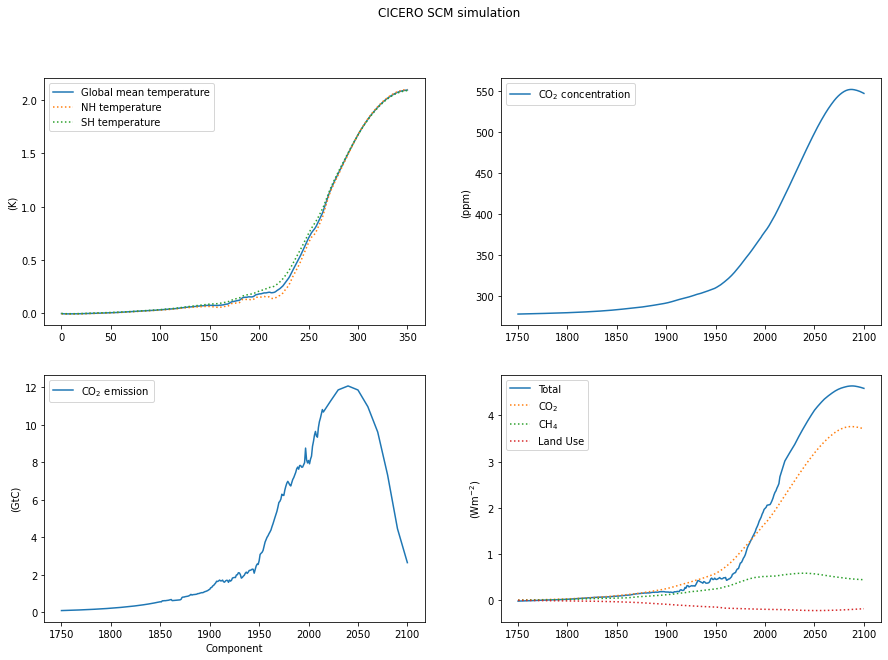

In [28]:


fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
axs=axs.flatten()
fig.suptitle('CICERO SCM simulation')

df_temp['dT_glob'].plot(ylabel='(K)',ax=axs[0])
df_temp['dT_NH'].plot(ylabel='(K)',ax=axs[0],linestyle=':')
df_temp['dT_SH'].plot(ylabel='(K)',ax=axs[0],linestyle=':')
axs[0].legend(['Global mean temperature','NH temperature','SH temperature'])

df_conc['CO2'].plot(ylabel='(ppm)',ax=axs[1])
axs[1].legend([r'CO$_2$ concentration'])

df_em['CO2'].plot(ylabel='(GtC)',ax=axs[2])
axs[2].legend([r'CO$_2$ emission'])

df_forc['Total_forcing'].plot(ylabel='(Wm$^{-2}$)',ax=axs[3])
df_forc['CO2'].plot(ylabel='(Wm$^{-2}$)',ax=axs[3],linestyle=':')
df_forc['CH4'].plot(ylabel='(Wm$^{-2}$)',ax=axs[3],linestyle=':')
df_forc['LANDUSE'].plot(ylabel='(Wm$^{-2}$)',ax=axs[3],linestyle=':')

axs[3].legend([r'Total','CO$_2$','CH$_4$','Land Use'])

Plot concentrations

In [181]:
scen = 'a4x'
cscm._run(
        {
            "gaspamfile": os.path.join(test_data_dir, "gases_v1RCMIP.txt"),
            "nyend": 2100,
            "concentrations_file": os.path.join(test_data_dir, "ssp245_conc_test.txt"),
            "emissions_file": os.path.join(test_data_dir, "ssp245_em_RCMIP.txt"),
            "nat_ch4_file": os.path.join(test_data_dir, "natemis_ch4.txt"),
            "nat_n2o_file": os.path.join(test_data_dir, "natemis_n2o.txt"),
            "conc_run":True,
            "results_as_dict":True
        },
        pamset_udm={"threstemp": 7.0, #scales vertical velocity as a function of mixed layer temperature
                    "rlamdo":16.0,#air-sea heat exchange coefficient (wm^-2K^-1)
                    "akapa":0.634, #vertical heat diffusivity
                    "cpi":0.4, #temperature change ratio: polar to nonpolar region
                    "W":4, #vertical velocity (m/yr)
                    "beto":3.5, #ocean interhemispheric heat exchange coeff (Wm^-2K^-1)
                    "lambda":0.54,
                    "mixed":60.0,  #mixed layer depth
                    "foan":0.61, #fraction of northern hemisphere covered by ocean
                    "foas":0.81, #fraction of northern hemisphere covered by ocean
                    "ebbeta":0.0,#atmospheric interhemispheric heat exchange 
                    "fnso":0.7531, #ocean area ratio, northern to southern hemisphere
                    "lm":40, #number of vertical layers
                    "ldtime":12
                   },
        pamset_emiconc={"lamb": 0.8,
                    "qbmb":0.03,
                    "qo3":0.4,
                    "qdirso2":-.457,
                    "qindso2":-.514,
                    "qbc":.2,
                    "qoc":-.103,
                    "ref_yr":2010,
                    "idtm":24},
    )

NameError: name 'outdir' is not defined

In [ ]:
cscm.results.keys()

In [ ]:
plt.plot(cscm.results['dT_glob'])